# Data Preprocessing

In [ ]:
#!pip install -r requirements.txt

In [ ]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing data

In [49]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [50]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rooms      216 non-null    float64
 1   location   217 non-null    object 
 2   condition  217 non-null    object 
 3   m2         217 non-null    int64  
 4   type       216 non-null    object 
 5   price      217 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.3+ KB


In [51]:
# Importing the datasets
df1 = pd.read_excel('Data-3-17.xlsx', sheet_name='main')
df2 = pd.read_excel('Data-3-17.xlsx', sheet_name='geo')
df3 = df1.merge(df2, how='inner', on='Порядковий номер')
df3.shape

C:\Users\kater\anaconda3\envs\labs\lib\site-packages\openpyxl\worksheet\_reader.py:315: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


(60, 84)

## Visualization

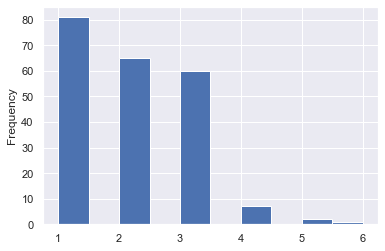

In [58]:
# Feature distribution
df['rooms'].plot(kind = 'hist')

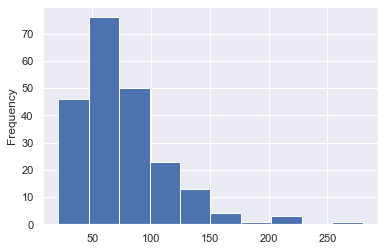

In [59]:
# Feature distribution
df['m2'].plot(kind = 'hist')

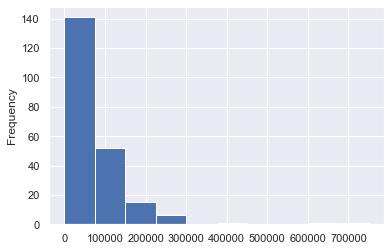

In [60]:
# Feature distribution
df['price'].plot(kind = 'hist')

## Statistics

In [61]:
# Dataset Statistics
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


## Mistakes

In [62]:
# Mistakes Deleting 
df = df.drop(df[df.price < 10000].index)
df = df.drop(df[df.price > 300000].index)
df.describe()

,rooms,m2,price
count,212.000000,213.000000,213.000000
mean,1.981132,73.953052,75524.676056
std,0.943736,33.115687,52002.814160
min,1.000000,21.000000,15000.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59538.000000
75%,3.000000,90.000000,90000.000000
max,6.000000,212.000000,280000.000000


## Missing data

### Simple

In [19]:
# Cheking Missing data
df.isnull().sum()

rooms        1
location     0
condition    0
m2           0
type         1
price        0
dtype: int64

In [64]:
df.dtypes

rooms        float64
location      object
condition     object
m2             int64
type          object
price          int64
dtype: object

In [15]:
#!pip install sklearn

In [20]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''

imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['rooms']] = imputer_mean.fit_transform(dfm[['rooms']]).round()

#strings
imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['type']] = imputer_freq.fit_transform(dfm[['type']])

In [21]:
dfm.isnull().sum()

rooms        0
location     0
condition    0
m2           0
type         0
price        0
dtype: int64

### Smart

In [63]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
type,1,0.004695
rooms,1,0.004695
price,0,0.000000
m2,0,0.000000
condition,0,0.000000
location,0,0.000000


In [29]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [30]:
# Function Missing data (non-numeric)
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

In [31]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)
df = fill_missing_char(df)

In [32]:
# Re-Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
rooms,0,0.0
location,0,0.0
condition,0,0.0
m2,0,0.0
type,0,0.0
price,0,0.0


## Log

In [35]:
#!pip install seaborn

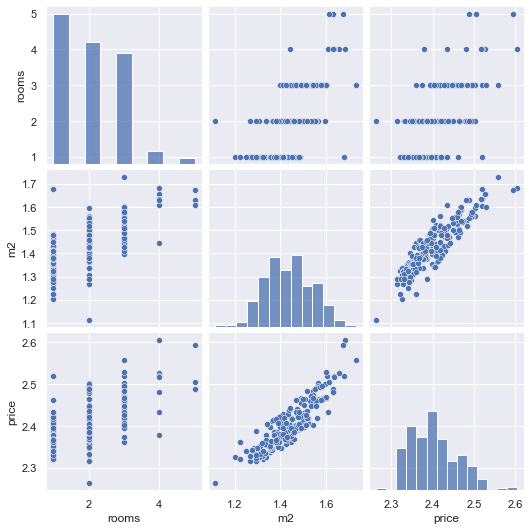

In [36]:
# Log Transformations for Skewed Distributions
df[['m2', 'price']] = np.log(df[['m2', 'price']])
#df.describe()
import seaborn as sns
sns.set()
sns.pairplot(df)

## Outliers

### Simple

In [24]:
# Outliers
rooms = []
for room in df['rooms']:
    if room > round(df['rooms'].mean() + 3 * df['rooms'].std()):
        room = round(dfm['rooms'].mean() + 3*df['rooms'].std()) 
    rooms.append(room)
dfm['rooms'] = rooms

In [25]:
dfm['rooms'].describe()

count    217.000000
mean       2.009217
std        0.952535
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: rooms, dtype: float64

### Smart

In [37]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [38]:
# Outliers
df = outliers(df)
df.describe()

,rooms,m2,price
count,217.000000,217.000000,217.000000
mean,2.007375,1.437588,-inf
std,0.946837,0.103459,NaN
min,1.000000,1.126587,-inf
25%,1.000000,1.358877,2.359179
50%,2.000000,1.436201,2.397399
75%,3.000000,1.506488,2.434277
max,4.866820,1.728960,2.604749


## Encoding

### Simple

In [45]:
'''from sklearn.preprocessing import LabelEncoder
dfm = df
dfm[['location']] = LabelEncoder().fit_transform(dfm[['location']])
dfm[['location']]'''

"from sklearn.preprocessing import LabelEncoder\ndfm = df\ndfm[['location']] = LabelEncoder().fit_transform(dfm[['location']])\ndfm[['location']]"

### Smart

In [41]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [42]:
# Encoding categorical data
df = encoding_char(df)

In [43]:
df

,rooms,location,condition,m2,type,price
0,2.0,0,0,1.364055,0,2.347855
1,1.0,1,0,1.283962,0,2.347855
2,3.0,0,0,1.436201,0,2.405335
3,2.0,0,0,1.126587,0,2.263408
4,1.0,0,0,1.483130,1,2.398086
...,...,...,...,...,...,...
212,2.0,1,1,1.428968,1,2.374460
213,3.0,1,1,1.488584,1,2.394492
214,3.0,1,1,1.511296,1,2.403245
215,2.0,1,1,1.453174,1,2.383423


In [75]:
# Descriptive Statistics
df.describe()

,rooms,location,condition,m2,type,price
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.974612,0.727700,0.784038,4.213593,0.798122,11.045684
std,0.917869,0.446192,0.412458,0.419977,0.402347,0.590462
min,1.000000,0.000000,0.000000,3.044522,0.000000,9.615805
25%,1.000000,0.000000,1.000000,3.891820,1.000000,10.582257
50%,2.000000,1.000000,1.000000,4.204693,1.000000,10.994370
75%,3.000000,1.000000,1.000000,4.499810,1.000000,11.407565
max,4.805655,1.000000,1.000000,5.356586,1.000000,12.542545


### Manual

In [53]:
# Cheking categorical data
dfs = df3[['Кластеризация магазинов','Формат магазину (light  standart)','Формат (старий/новий)','Успех']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
1,Формат магазину (light standart),4,"[Light, Standart, Micro, Premium]",object
2,Формат (старий/новий),2,"[новий, старий]",object
3,Успех,2,"[не успішний, успішний]",object
0,Кластеризация магазинов,3,"[Преміальний, Стандартний, Соціальний]",object


In [59]:
# Encoding
fm = {'Micro':0,'Light':1,'Standart':2,'Premium':3}
fo = {'старий':0,'новий':1}
us = {'не успішний':0,'успішний':1}
cl = {'Соціальний':0,'Стандартний':1,'Преміальний':2}

df3['Формат магазину (light  standart)'] = df3['Формат магазину (light  standart)'].map(fm)
df3['Формат (старий/новий)'] = df3['Формат (старий/новий)'].map(fo)
df3['Успех'] = df3['Успех'].map(us)
df3['Кластеризация магазинов'] = df3['Кластеризация магазинов'].map(cl)
df3

,Порядковий номер,Адрес_x,Торговельна площа кв. м.,Количество касс,Дата открытия,Місяців з дати відкриття,Дата реконструкции,Количество сотрудников в магазине,Кластеризация магазинов,Формат магазину (light standart),...,Церква,Епіцентр,МАФ,Вбудоване приміщення,Лінія від вулиці,Випікання хліба,Запікання мяса,Туристичний обєкт,Новозбудований ЖК більше 500 квартир,Спорт комплекс
0,1,Личаківська 63,22.000,1,2015-01-01,74,2019-08-08,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,Коломийська 1,30.000,1,2020-12-25,2,2020-12-25,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,3,Ч. Калини 102,40.780,2,2020-07-29,7,2020-07-29,3,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,Наукова 55,45.000,1,2015-01-01,74,2019-06-15,3,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,Володимира Великого 111,32.000,2,2010-01-01,134,2016-11-05,3,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
5,6,Львів вул.Сихівська 28,11.648,2,2010-01-01,134,NaT,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,7,Патона 9,23.420,2,2010-01-01,134,2018-04-02,3,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,8,Довженка 4,25.440,1,2015-01-01,74,2020-08-10,2,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
8,9,Львів вул.Сихівська 5,45.000,2,2016-07-15,56,2016-07-15,3,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,10,Левицького 11,18.000,1,2019-11-11,16,2019-11-11,2,NaN,NaN,...,0,0,0,1,1,0,0,0,0,0


## Exporting

In [76]:
# Exporting the dataset
df.to_csv('flats_prep.csv', sep=';', index=False)

## Splitting

In [77]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))